# 線形回帰モデル
## 概要
線形回帰モデルでは、回帰問題を扱い、直線で予測する。入力データはm次元のベクトル（スカラー値もあり得る）となり、各要素のことを説明変数と呼ぶ。出力データはスカラー値となり目的変数と呼ぶ。また、線形回帰モデルは教師あり学習に分類される。パラメータの推定は最小二乗法によって行われる。モデル学習の際にはデータを学習用データと検証用データに分割する。検証用のデータを学習用データから分割しておくことで、モデルの未知のデータに対する予測精度を測定することができるためである。

## 実装演習
- ボストンの住宅データセットを線形回帰モデルで分析
  - 適切な査定結果が必要
  - 高すぎても安すぎても会社に損害がある
- 課題
  - 部屋数が4で犯罪率が0.3の物件はいくらになるか？

In [2]:
#from モジュール名 import クラス名（もしくは関数名や変数名）
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlibをinlineで表示するためのおまじない (plt.show()しなくていい)
%matplotlib inline

In [3]:
#データセットの確認
from sklearn.datasets import load_boston
boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["PRICE"] = np.array(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#RM（住居ごとの部屋数の平均）、CRIM（犯罪率）を説明変数、PRICEを目的変数とする
x = df[["RM", "CRIM"]]
y = df["PRICE"]

## sklearnモジュールからLinearRegressionをインポート
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#パラメータ推定
model.fit(x, y)

#部屋数4、犯罪率0.3の場合のPRICEを推定
model.predict([[4, 0.3]])

array([4.24007956])

## 関連記事
関連記事として、以下を参照した。<br>
機械学習のための公開データセットとして、本演習で使用したデータ以外でよく使われるものとしては、アヤメの計測データ、糖尿病患者の診断データ、数字の手書き文字、生理学的特徴と運動能力の関係などがあり、いずれもscikit-learnで容易にデータ取得することが可能である。<br>
scikit-learn に付属しているデータセット<Br>
https://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%AB%E4%BB%98%E5%B1%9E%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88

# 非線形回帰モデル
## 概要
データが複雑な非線形構造をしている場合に有効なモデル。非線形回帰モデルの学習の際の課題は大きく２つある。1つ目が未学習。データの構造をうまく捉えられておらず、十分小さな誤差が得られないモデルのこと。この場合の対策としては表現力の高いモデルを利用する。2つ目が過学習。十分小さな誤差は得られたが、未知のデータにモデルを適用した場合の予測精度が悪くなること。対策としては学習のデータを増やすこと、正則化によりモデルの表現力を抑止し、過度に学習データに合わせたパラメタにならないようにすることなどが挙げられる。

## 実装演習
ボストンの住宅価格データを用いて、以下演習する。<br>
- 説明変数：CRIM
- 目的変数：PRICE
- モデル：線形、非線形回帰モデル
- 確認観点：より当てはまりが良いのはどちらのモデルか。

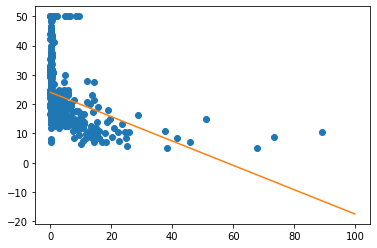

In [28]:
#線形回帰

x = df["CRIM"].values.reshape(-1, 1)
y = df["PRICE"].values

## sklearnモジュールからLinearRegressionをインポート
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#パラメータ推定
model.fit(x, y)

x2 = np.arange(0, 100, 0.1).reshape(-1, 1)
predicted_y = model.predict(x2)

plt.plot(x, y, "o")
plt.plot(x2, predicted_y)

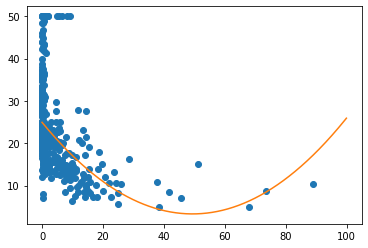

In [39]:
#非線形回帰（2次関数

from sklearn.preprocessing import PolynomialFeatures

x = df["CRIM"].values.reshape(-1, 1)
y = df["PRICE"].values

## sklearnモジュールからLinearRegressionをインポート
from sklearn.linear_model import LinearRegression
model = LinearRegression()

pf = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = pf.fit_transform(x)
model.fit(x_poly,y)

x2 = np.arange(0, 100, 0.1).reshape(-1, 1)
x2_poly = pf.fit_transform(x2)
predicted_y = model.predict(x2_poly)

plt.plot(x, y, "o")
plt.plot(x2, predicted_y)

## 演習結果
2次関数のほうが当てはまりが良いように見える。ただし、0付近の犯罪率は同程度の犯罪率であっても住宅価格にばらつきがあるため、説明変数を増やしてみる等で改善できると考える。

## 関連記事
正則化にはLasso回帰とRidge回帰という２つの手法がある。Lasso回帰は偏回帰係数を0にする（＝説明力のない説明変数を落とす）のに対し、Ridge回帰は偏回帰係数を徐々に小さくしていく（=説明変数の影響度を小さくするだけで落とすわけではない）という違いがある。

# ロジスティック回帰モデル
## 概要
ロジスティック回帰は教師あり学習の分類問題に用いられるモデルである。分類問題に用いられるため線形回帰モデルと異なり出力する目的変数は0 or 1の値となる。ロジスティック回帰に用いられるシグモイド関数は、必ず0~1の値を出力し、その値は目的変数y=1となる確率を表している。また、パラメタ推定は尤度関数の最大化により行われる。尤度関数の最大化は、最小二乗法と異なり解析的に求めることが困難なため、勾配降下法などの手法で求められる。
<br>https://www.n-insight.co.jp/niblog/20190917-1351/　参照

## 演習問題
- 設定
- ○タイタニックの乗客データを利用しロジスティック回帰モデルを作成
- ○特徴量抽出をしてみる
- ●課題
- ○年齢が30歳で男の乗客は生き残れるか？

In [41]:
#from モジュール名 import クラス名（もしくは関数名や変数名）
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlibをinlineで表示するためのおまじない (plt.show()しなくていい)
%matplotlib inline

In [42]:
#データセットの確認
df = pd.read_csv('/content/drive/My Drive/002_Work/002_Study-AI/002_機械学習/data/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
#予測に不要と考えるカラムをドロップ
df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

#一部カラムをドロップしたデータを表示
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [51]:
#nullを含んでいる行を表示
df[df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


In [53]:
#Ageカラムのnullを中央値で補完

df['AgeFill'] = df['Age'].fillna(df['Age'].mean())

#再度nullを含んでいる行を表示 (Ageのnullは補完されている)
df[df.isnull().any(1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill
5,0,3,male,NaN,0,0,8.4583,Q,29.699118
17,1,2,male,NaN,0,0,13.0000,S,29.699118
19,1,3,female,NaN,0,0,7.2250,C,29.699118
26,0,3,male,NaN,0,0,7.2250,C,29.699118
28,1,3,female,NaN,0,0,7.8792,Q,29.699118
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,29.699118
863,0,3,female,NaN,8,2,69.5500,S,29.699118
868,0,3,male,NaN,0,0,9.5000,S,29.699118
878,0,3,male,NaN,0,0,7.8958,S,29.699118


In [62]:
#説明変数：年齢、目的変数：生 or 死としてロジスティック回帰
from sklearn.linear_model import LogisticRegression
x = df["AgeFill"].values.reshape(-1, 1)
y = df["Survived"].values
model=LogisticRegression()
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
model.predict([[30]])

array([0])

## 演習結果
30歳の人は生き残れない。

## 関連記事
- SGDの欠点として、関数の形状が等方的ではない場合、非効率的な経路で探索してしまう点が挙げられる。これら欠点解消のための他のパラメタ更新方法として、Momentum、AdaGrad、Adamなどがある。
- パラメタ更新の際にどの初期値を与えるかは非常に重要な要素である。有効な初期値としてはXavierの初期値、Heの初期値等がある。
<br>（ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装参照）

# 主成分分析
## 概要
説明変数が大量にある場合、それら説明変数を少数個の変数に圧縮する手法のこと。説明変数を2、3の変数に圧縮することによって、可視化が実現可能になる。寄与率は圧縮後の変数が持つ情報量の割合のことで、その圧縮後の変数で説明変数をどの程度説明できるのか、を知る指標として使用できる。また累積寄与率により、変数を圧縮したことによって損失してしまった情報量を把握することができる。

## 演習問題
- 設定
  - ○乳がん検査データを利用しロジスティック回帰モデルを作成
  - ○主成分を利用し2次元空間上に次元圧縮
- ●課題
  - ○32次元のデータを2次元上に次元圧縮した際に、うまく判別できるかを確認

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
#データセットの確認
df = pd.read_csv('/content/drive/My Drive/002_Work/002_Study-AI/002_機械学習/data/cancer.csv')
df.drop('Unnamed: 32', axis=1, inplace=True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


X_train_pca shape: (426, 2)
explained variance ratio: [0.43315126 0.19586506]


Text(0, 0.5, 'PC 2')

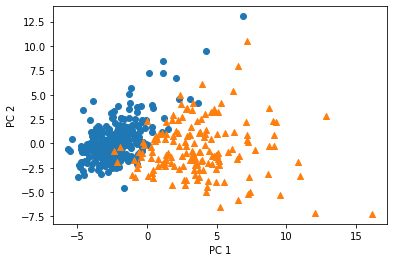

In [72]:
# 目的変数の抽出
y = df.diagnosis.apply(lambda d: 1 if d == 'M' else 0)
# 説明変数の抽出
X = df.loc[:, 'radius_mean':]

# 学習用とテスト用でデータを分離
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#PCA
# 次元数2まで圧縮
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
print('X_train_pca shape: {}'.format(X_train_pca.shape))
# X_train_pca shape: (426, 2)

# 寄与率
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))
# explained variance ratio: [ 0.43315126  0.19586506]

# 散布図にプロット
temp = pd.DataFrame(X_train_pca)
temp['Outcome'] = y_train.values
b = temp[temp['Outcome'] == 0]
m = temp[temp['Outcome'] == 1]
plt.scatter(x=b[0], y=b[1], marker='o') # 良性は○でマーク
plt.scatter(x=m[0], y=m[1], marker='^') # 悪性は△でマーク
plt.xlabel('PC 1') # 第1主成分をx軸
plt.ylabel('PC 2') # 第2主成分をy軸

## 演習結果
上図より2次元の変数に圧縮することによって、ほとんどのデータを線形分離することが可能と考える。

# アルゴリズム
## 概要
k近傍法は分類問題に用いられる手法。最近傍のデータk個を同じグループとして分類するアルゴリズムで、kの値を大きくするほど境界線はなめらかになる。k-meansは教師なし学習の分類問題に用いられる手法。kはクラスタリングの数を表しており、k近傍法とkの意味合いが異なることに注意。

## 演習問題
- ハンズオン設定
  - ○人口データを分類
  - ○配布済みのjupyter notebookを利用
- ●課題
  - ○人口データと分類結果をプロットしてください

In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

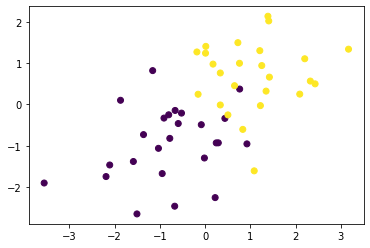

In [75]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    x_train = np.concatenate([x0, x1])
    y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return x_train, y_train
  
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

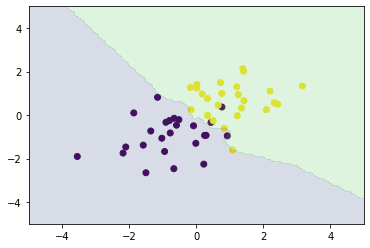

In [76]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

def knc_predict(n_neighbors, x_train, y_train, X_test):
    y_pred = np.empty(len(X_test), dtype=y_train.dtype)
    for i, x in enumerate(X_test):
        distances = distance(x, X_train)
        nearest_index = distances.argsort()[:n_neighbors]
        mode, _ = stats.mode(y_train[nearest_index])
        y_pred[i] = mode
    return y_pred

def plt_resut(x_train, y_train, y_pred):
    xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    xx = np.array([xx0, xx1]).reshape(2, -1).T
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    plt.contourf(xx0, xx1, y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3))
  
n_neighbors = 3

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)
plt_resut(X_train, ys_train, y_pred)

## 関連記事
k-meansのクラスタ数はハイパーパラメータであるが、クラスタ数を設定する際に有効な手法としてエルボー法がある。エルボー法はクラスごとにSSE（クラスタ内誤差平方和）を計算し、SEEが大きく減少するクラスタ数をパラメタとして設定する手法。具体的にどれくらいの数値までSEEが減少したら、といった閾値があるわけではない。
<br>https://hkawabata.github.io/technical-note/note/ML/Evaluation/elbow-method.html  参考

# サポートベクターマシーン
## 概要
サポートベクターマシーン（SVM）はもともと2クラス分類問題のために考案されていたが、その後、回帰問題や教師なし問題へも応用されることになった。SVMの2クラス分類問題では、データを2つのクラスに分けるための境界線が引かれる。最適な境界線はマージン最大化によって求められる。マージンとは境界線から2つのクラスがどれほど離れているかを意味する用語である。

## 演習
データをプロットすることで、線形分離できる例と線形分離できない例を確認する。

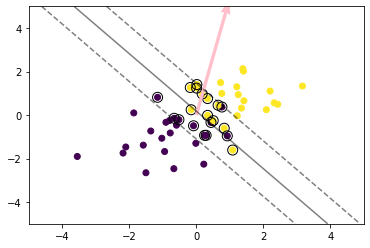

In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 2.
    x1 = np.random.normal(size=50).reshape(-1, 2) + 2.
    X_train = np.concatenate([x0, x1])
    ys_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return X_train, ys_train

#線形分離可能な例

#学習
t = np.where(ys_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# 線形カーネル
K = X_train.dot(X_train.T)

eta1 = 0.01
eta2 = 0.001
n_iter = 500

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)

index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)

# 訓練データを可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
#plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


# マージンと決定境界を可視化
plt.quiver(0, 0, 0.1, 0.35, width=0.01, scale=1, color='pink')

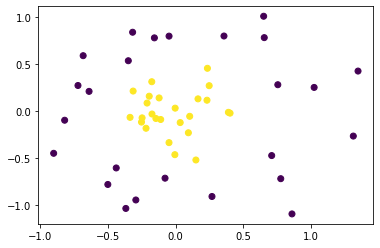

In [78]:
# 線形分離不可能な例
factor = .2
n_samples = 50
linspace = np.linspace(0, 2 * np.pi, n_samples // 2 + 1)[:-1]
outer_circ_x = np.cos(linspace)
outer_circ_y = np.sin(linspace)
inner_circ_x = outer_circ_x * factor
inner_circ_y = outer_circ_y * factor

X = np.vstack((np.append(outer_circ_x, inner_circ_x),
               np.append(outer_circ_y, inner_circ_y))).T
y = np.hstack([np.zeros(n_samples // 2, dtype=np.intp),
               np.ones(n_samples // 2, dtype=np.intp)])
X += np.random.normal(scale=0.15, size=X.shape)
x_train = X
y_train = y

plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

## 関連記事
SVMの応用例の一つにOne Class SVMがある。通常のSVMが教師あり学習なのに対し、教師なし学習である点が異なる。主に外れ値検出タスクに用いられることが多い。One Class SVMでは学習データのすべてをクラスタ1、原点のみをクラスタ-1に属するように分類する。このときに、学習データは原点から遠くなるように配置することで、異常データ（＝正常データと似ていないデータ）は原点近くに配置され、異常データを検知することが可能になる。
<br>https://hktech.hatenablog.com/entry/2018/10/11/235312   参照